# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [54]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(-10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2360,Jessicaport,2019-01-31 17:57:25,58.29,623154556195,1,Rural
2361,Michaelberg,2019-03-22 22:20:54,38.30,8032727406577,6,Rural
2362,North Holly,2019-04-18 19:26:25,30.94,3441061016826,8,Rural
2363,Michaelberg,2019-03-13 14:40:18,37.72,8842606115175,6,Rural


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_ride_count = pd.Series(pyber_data_df.groupby(["type"], axis =0).count()["ride_id"], name = "Total Rides")
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_driver_amount = pd.Series(city_data_df.groupby(['type'], axis =0).sum()["driver_count"], name = "Total Drivers")
total_driver_amount

type
Rural         78
Suburban     490
Urban       2405
Name: Total Drivers, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_amount = pd.Series(pyber_data_df.groupby(['type'], axis =0).sum()["fare"], name = "Total Fares")
total_fare_amount

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_amount = pd.Series(pyber_data_df.groupby(['type'], axis =0).mean()["fare"], name = "Average Fare per Ride")
avg_fare_amount

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fare per Ride, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = pd.Series(total_fare_amount/total_driver_amount, name = "Average Fare per Driver")
avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: Average Fare per Driver, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([total_ride_count, total_driver_amount, total_fare_amount, avg_fare_amount, avg_driver_fare], axis = 1)



In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [10]:
#  8. Format the columns.
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].apply(lambda x: "${:,.2f}".format((x)))
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].apply(lambda x: "${:.2f}".format((x)))
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].apply(lambda x: "${:.2f}".format((x)))
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pivot_df = pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum()["fare"])
pivot_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pivot_df = pivot_df.reset_index()


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df = pivot_df.pivot(index = "date", columns = "type", values = "fare")
pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

jan_apr_2019_pivot_df = pd.DataFrame(pivot_df.loc[(pivot_df.index >= '2019-01-01')& (pivot_df.index < '2019-04-29')])
#jan_apr_2019_pivot_df = pivot_df.loc[(pivot_df["date"] >= '2019-01-01')& (pivot_df["date"] < '2019-04-29')]
#jan_apr_2019_pivot_df.set_index("date",inplace=True)
jan_apr_2019_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_apr_2019_pivot_df.index = pd.to_datetime(jan_apr_2019_pivot_df.index)


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_2019_pivot_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_bins = jan_apr_2019_pivot_df.resample('W').sum()
weekly_bins

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


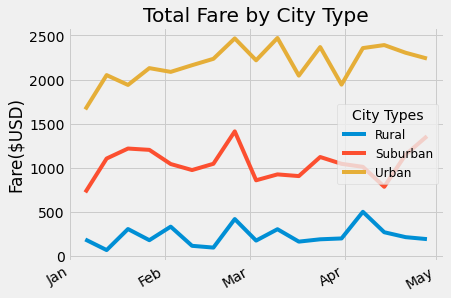

In [62]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = plt.axes()

ax.plot(weekly_bins.index, weekly_bins)


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

lgnd = plt.legend(weekly_bins,fontsize="12", mode="Expanded", loc="best", title="City Types")


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/Final_Fare.png")


<AxesSubplot:xlabel='date'>

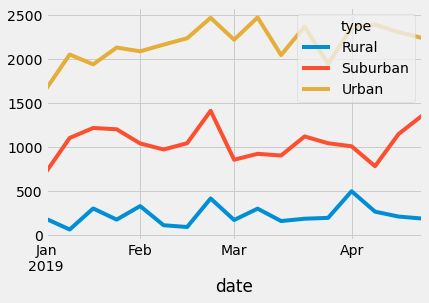

In [32]:
weekly_bins.plot()

plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")